# Friendships within a Distributed Group (2017)

## Packages & Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pagerank import powerIteration

## Importing Data

### How well do you know this person?

In [2]:
data_2017_know = pd.read_csv("data/2017_know.csv", index_col=0)
data_2017_know

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,2.0,4.0,5.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,4.0,3.0
Emma,3.0,NaN,4.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,2.0,5.0,2.0,5.0
Gabby,4.0,3.0,NaN,4.0,4.0,5.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,5.0
Cam,5.0,3.0,3.0,NaN,4.0,5.0,3.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0
Andrew,3.0,2.0,3.0,5.0,NaN,5.0,2.0,3.0,3.0,4.0,2.0,3.0,4.0,5.0
Isaac,4.0,3.0,5.0,4.0,5.0,NaN,4.0,2.0,4.0,4.0,3.0,4.0,2.0,5.0
Alex,4.0,4.0,5.0,4.0,3.0,4.0,NaN,5.0,3.0,4.0,3.0,4.0,4.0,5.0
Arielle,4.0,4.0,4.0,4.0,3.0,4.0,5.0,NaN,3.0,4.0,2.0,3.0,3.0,3.0
Liam,4.0,3.0,5.0,5.0,5.0,5.0,3.0,4.0,NaN,5.0,3.0,5.0,4.0,4.0
James,4.0,5.0,4.0,5.0,3.0,5.0,4.0,3.0,4.0,NaN,4.0,5.0,4.0,5.0


### How much do you like this person?

In [3]:
data_2017_like = pd.read_csv("data/2017_like.csv", index_col=0)
data_2017_like

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,4.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,1.0
Emma,4.0,NaN,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,5.0
Gabby,5.0,5.0,NaN,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0
Cam,5.0,4.0,4.0,NaN,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0
Andrew,4.0,5.0,5.0,5.0,NaN,5.0,2.0,4.0,3.0,5.0,3.0,2.0,5.0,4.0
Isaac,3.0,4.0,5.0,4.0,4.0,NaN,4.0,4.0,3.0,4.0,3.0,2.0,3.0,5.0
Alex,5.0,5.0,5.0,5.0,4.0,5.0,NaN,5.0,4.0,4.0,4.0,5.0,5.0,3.0
Arielle,5.0,5.0,5.0,5.0,4.0,5.0,5.0,NaN,4.0,5.0,4.0,5.0,4.0,4.0
Liam,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,NaN,5.0,4.0,5.0,5.0,4.0
James,4.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,4.0,NaN,4.0,5.0,4.0,3.0


### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

In [4]:
data_2017_contact = pd.read_csv("data/2017_contact.csv", index_col=0)
data_2017_contact

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,1.0,4.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0
Emma,2.0,NaN,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,5.0
Gabby,3.0,1.0,NaN,3.0,2.0,5.0,3.0,1.0,1.0,4.0,1.0,1.0,1.0,5.0
Cam,4.0,2.0,3.0,NaN,2.0,3.0,2.0,3.0,2.0,3.0,1.0,2.0,1.0,1.0
Andrew,1.0,1.0,2.0,3.0,NaN,4.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0
Isaac,1.0,1.0,5.0,2.0,3.0,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0
Alex,2.0,2.0,3.0,3.0,1.0,1.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,1.0
Arielle,1.0,1.0,1.0,3.0,1.0,1.0,5.0,NaN,1.0,1.0,1.0,1.0,1.0,2.0
Liam,2.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,NaN,3.0,2.0,2.0,2.0,2.0
James,2.0,1.0,4.0,4.0,2.0,3.0,1.0,1.0,1.0,NaN,1.0,2.0,1.0,5.0


### How much do you trust this person?

In [5]:
data_2017_trust = pd.read_csv("data/2017_trust.csv", index_col=0)
data_2017_trust

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,3.0,4.0,5.0,1.0,1.0,3.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0
Emma,4.0,NaN,4.0,4.0,4.0,3.0,4.0,5.0,3.0,4.0,2.0,5.0,3.0,5.0
Gabby,5.0,4.0,NaN,5.0,3.0,3.0,5.0,4.0,3.0,4.0,3.0,5.0,4.0,4.0
Cam,5.0,2.0,3.0,NaN,3.0,5.0,2.0,5.0,3.0,5.0,3.0,2.0,3.0,1.0
Andrew,4.0,4.0,4.0,5.0,NaN,5.0,2.0,4.0,3.0,3.0,1.0,2.0,5.0,3.0
Isaac,4.0,5.0,5.0,3.0,4.0,NaN,3.0,4.0,4.0,3.0,3.0,1.0,2.0,5.0
Alex,5.0,5.0,5.0,4.0,2.0,4.0,NaN,5.0,2.0,3.0,3.0,4.0,4.0,2.0
Arielle,5.0,5.0,5.0,5.0,4.0,3.0,5.0,NaN,3.0,3.0,4.0,5.0,3.0,3.0
Liam,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,NaN,5.0,3.0,4.0,5.0,4.0
James,3.0,3.0,4.0,5.0,4.0,4.0,3.0,3.0,2.0,NaN,3.0,3.0,2.0,2.0


### How likely are you to go to this person for advice or emotional support?

In [6]:
data_2017_support = pd.read_csv("data/2017_support.csv", index_col=0)
data_2017_support

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,NaN,2.0,4.0,5.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0
Emma,2.0,NaN,3.0,2.0,2.0,2.0,3.0,5.0,1.0,2.0,2.0,3.0,2.0,5.0
Gabby,2.0,4.0,NaN,5.0,3.0,4.0,2.0,2.0,1.0,3.0,1.0,3.0,2.0,3.0
Cam,4.0,1.0,1.0,NaN,2.0,4.0,1.0,5.0,2.0,4.0,1.0,2.0,1.0,1.0
Andrew,2.0,2.0,2.0,2.0,NaN,5.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0
Isaac,1.0,1.0,5.0,2.0,3.0,NaN,1.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0
Alex,4.0,5.0,5.0,3.0,1.0,3.0,NaN,5.0,1.0,1.0,1.0,2.0,3.0,1.0
Arielle,1.0,1.0,1.0,3.0,1.0,1.0,5.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
Liam,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,1.0,2.0,1.0,2.0
James,3.0,2.0,3.0,5.0,3.0,4.0,2.0,3.0,2.0,NaN,1.0,4.0,2.0,1.0


### General Data / Demographics

In [7]:
data_2017_demographics = pd.read_csv("data/2017_demographics.csv", index_col=0)
data_2017_demographics

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Steph,Ananth,Female,Asian,Pittsburgh,PA,Carnegie Mellon University,15289,Information Systems,Chocolate Chip
Gabby,Bodet,Female,Black or African American,Atlanta,GA,Emory University,30322,Theater Studies,Chocolate Chip
Ziqian,Zhang,Female,Asian,Boston,MA,NaN,2446,NaN,NaN
Alex,Minasian,Female,White,Wenham,MA,Gordon College,1984,Kinesiology,Chocolate Chip
Emma,Bergstrom,Female,White,Wheaton,IL,Wheaton College,60187,Biology (pre-dental),Chocolate Chip
Cam,Hudson,Male,White,Rochester,NY,Rochester Institute of Technology,14623,Computer Engineering,Chocolate Chip & Butterscotch
Isaac,McGonagle,Male,White,Pittsburgh,PA,University of Pittsburgh,15213,Electrical Engineering,Peanut Butter Chocolate Chip
Liam,O'Toole,Male,White,"Washington, D.C.",DC,The Catholic University of America,20064,Theology,Chocolate Chip
Michelle,Zhou,Female,Asian,Chestnut Hill,MA,Boston College,2467,Theology and Applied Psychology/Human Development,Snickerdoodle


In [8]:
people = list(data_2017_demographics.sort_values(by=['lname']).index)
people

['Steph',
 'Emma',
 'Gabby',
 'Cam',
 'Andrew',
 'Isaac',
 'Alex',
 'Arielle',
 'Liam',
 'James',
 'Drew',
 'Ruben',
 'Ziqian',
 'Michelle']

In [9]:
data_2017_demographics_men = data_2017_demographics[data_2017_demographics['gender']=='Male']
data_2017_demographics_men

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Cam,Hudson,Male,White,Rochester,NY,Rochester Institute of Technology,14623,Computer Engineering,Chocolate Chip & Butterscotch
Isaac,McGonagle,Male,White,Pittsburgh,PA,University of Pittsburgh,15213,Electrical Engineering,Peanut Butter Chocolate Chip
Liam,O'Toole,Male,White,"Washington, D.C.",DC,The Catholic University of America,20064,Theology,Chocolate Chip
Andrew,Jeon,Male,Asian;White,Northfield,MN,St. Olaf College,55057,Computer Science; Economics,Sugar Cookie
Drew,Pelusi,Male,White,Boston,MA,Boston University,2215,Computer Science,Sugar Cookie
James,Palmer,Male,White,Boston,MA,Boston University,2215,International Relations,Brownies
Ruben,Walter,Male,White,Wheaton,IL,Wheaton College,60187,International Relations,Oatmeal Raisin


In [10]:
data_2017_demographics_women = data_2017_demographics[data_2017_demographics['gender']=='Female']
data_2017_demographics_women

,lname,gender,ethnicity,city,state,college,zip code,major,cookie
fname,,,,,,,,,
Steph,Ananth,Female,Asian,Pittsburgh,PA,Carnegie Mellon University,15289,Information Systems,Chocolate Chip
Gabby,Bodet,Female,Black or African American,Atlanta,GA,Emory University,30322,Theater Studies,Chocolate Chip
Ziqian,Zhang,Female,Asian,Boston,MA,NaN,2446,NaN,NaN
Alex,Minasian,Female,White,Wenham,MA,Gordon College,1984,Kinesiology,Chocolate Chip
Emma,Bergstrom,Female,White,Wheaton,IL,Wheaton College,60187,Biology (pre-dental),Chocolate Chip
Michelle,Zhou,Female,Asian,Chestnut Hill,MA,Boston College,2467,Theology and Applied Psychology/Human Development,Snickerdoodle
Arielle,Moreira,Female,Brazilian American,Wenham,MA,Gordon College,1984,Social Work,Chocolate Chip


In [11]:
men = list(data_2017_demographics_men.index)
men

['Cam', 'Isaac', 'Liam', 'Andrew', 'Drew', 'James', 'Ruben']

In [12]:
women = list(data_2017_demographics_women.index)
women

['Steph', 'Gabby', 'Ziqian', 'Alex', 'Emma', 'Michelle', 'Arielle']

## PageRank: The Numbers

### How well do you know this person?

In [13]:
pr_2017_know = powerIteration(data_2017_know)
pr_2017_know.sort_values(ascending=False)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


Cam         0.083307
Michelle    0.080549
Isaac       0.078292
Gabby       0.078014
James       0.077626
Ruben       0.075291
Steph       0.071081
Andrew      0.068307
Emma        0.067573
Ziqian      0.066944
Alex        0.064576
Liam        0.064306
Arielle     0.062643
Drew        0.061491
dtype: float64

### How much do you like this person?

In [14]:
pr_2017_like = powerIteration(data_2017_like)
pr_2017_like.sort_values(ascending=False)

Arielle     0.077967
Gabby       0.076961
Cam         0.076868
Emma        0.075167
James       0.074821
Isaac       0.071840
Steph       0.071654
Andrew      0.070102
Ruben       0.070012
Ziqian      0.069086
Alex        0.068777
Drew        0.067095
Liam        0.066715
Michelle    0.062936
dtype: float64

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

In [15]:
pr_2017_contact = powerIteration(data_2017_contact)
pr_2017_contact.sort_values(ascending=False)

Gabby       0.096908
Cam         0.095811
Michelle    0.095057
Isaac       0.088954
James       0.078608
Steph       0.077483
Alex        0.068506
Andrew      0.066945
Emma        0.061005
Arielle     0.060029
Ruben       0.057839
Ziqian      0.052834
Liam        0.050819
Drew        0.049202
dtype: float64

### How much do you trust this person?

In [16]:
pr_2017_trust = powerIteration(data_2017_trust)
pr_2017_trust.sort_values(ascending=False)

Cam         0.082933
Arielle     0.082595
Gabby       0.081326
Emma        0.079309
Steph       0.078023
James       0.072426
Isaac       0.072400
Ruben       0.068126
Andrew      0.068029
Alex        0.066819
Ziqian      0.065379
Michelle    0.063672
Liam        0.059659
Drew        0.059306
dtype: float64

### How likely are you to go to this person for advice or emotional support?

In [17]:
pr_2017_support = powerIteration(data_2017_support)
pr_2017_support.sort_values(ascending=False)

Cam         0.095395
Arielle     0.093887
Gabby       0.087736
Isaac       0.087159
Emma        0.075109
Steph       0.070976
Michelle    0.070740
Alex        0.070368
Andrew      0.068847
James       0.066255
Ruben       0.064187
Ziqian      0.055337
Liam        0.049379
Drew        0.044626
dtype: float64

## PageRank: Basic Analysis

### How well do you know this person?

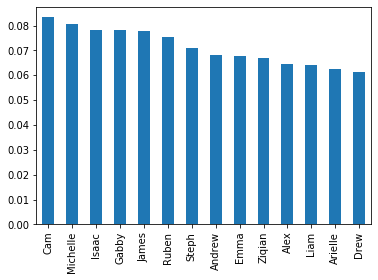

In [18]:
pr_2017_know.sort_values(ascending=False).plot.bar()

In [19]:
pr_2017_know_men = pr_2017_know[pr_2017_know.index.isin(men)==True]
pr_2017_know_men

Cam       0.083307
Andrew    0.068307
Isaac     0.078292
Liam      0.064306
James     0.077626
Drew      0.061491
Ruben     0.075291
dtype: float64

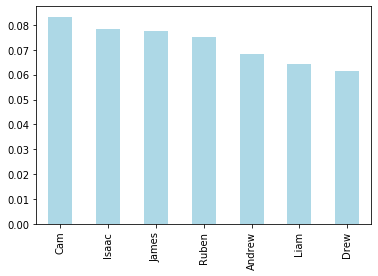

In [20]:
pr_2017_know_men_plot = pr_2017_know_men.sort_values(ascending=False).plot.bar(color="LightBlue")
pr_2017_know_men_plot

In [21]:
pr_2017_know_women = pr_2017_know[pr_2017_know.index.isin(women)==True]
pr_2017_know_women

Steph       0.071081
Emma        0.067573
Gabby       0.078014
Alex        0.064576
Arielle     0.062643
Ziqian      0.066944
Michelle    0.080549
dtype: float64

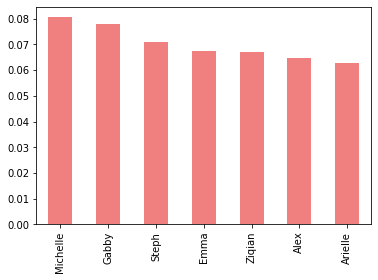

In [22]:
pr_2017_know_women_plot = pr_2017_know_women.sort_values(ascending=False).plot.bar(color="LightCoral")
pr_2017_know_women_plot

In [23]:
pr_2017_know_descending = []
pr_2017_know_men_values = []
pr_2017_know_women_values = []

for person in pr_2017_know.sort_values(ascending=False).index:
    pr_2017_know_descending += [person]
    if person in men:
        pr_2017_know_men_values += [pr_2017_know[person]]
        pr_2017_know_women_values += [0.0]
    elif person in women:
        pr_2017_know_women_values += [pr_2017_know[person]]
        pr_2017_know_men_values += [0.0]

In [24]:
pr_2017_know_men_values

[0.0833068505336428,
 0.0,
 0.07829198239198111,
 0.0,
 0.07762619237955737,
 0.07529131625291913,
 0.0,
 0.06830700012357968,
 0.0,
 0.0,
 0.0,
 0.06430570140950227,
 0.0,
 0.06149113586679408]

In [25]:
pr_2017_know_women_values

[0.0,
 0.08054900407779877,
 0.0,
 0.07801380353668094,
 0.0,
 0.0,
 0.07108130576898808,
 0.0,
 0.06757301624762663,
 0.06694402793830098,
 0.06457560697336293,
 0.0,
 0.06264305649926506,
 0.0]

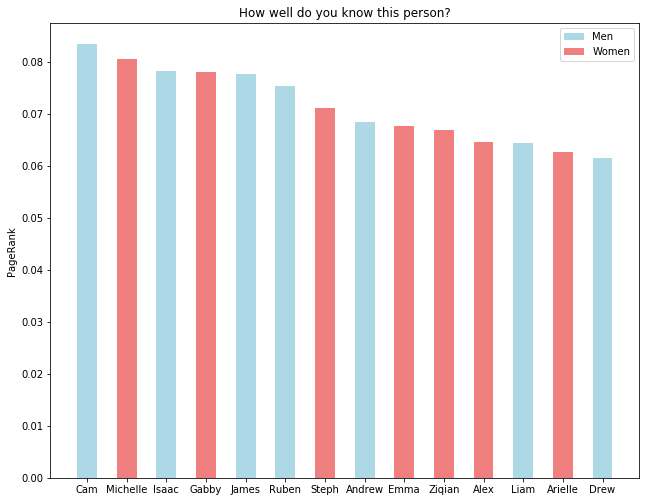

In [26]:
N = len(pr_2017_know_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, pr_2017_know_men_values, width, color="LightBlue")
p2 = ax.bar(ind, pr_2017_know_women_values, width, color="LightCoral")
ax.set_ylabel('PageRank')
ax.set_title('How well do you know this person?')
ax.set_xticks(ind)
ax.set_xticklabels(pr_2017_know_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you like this person?

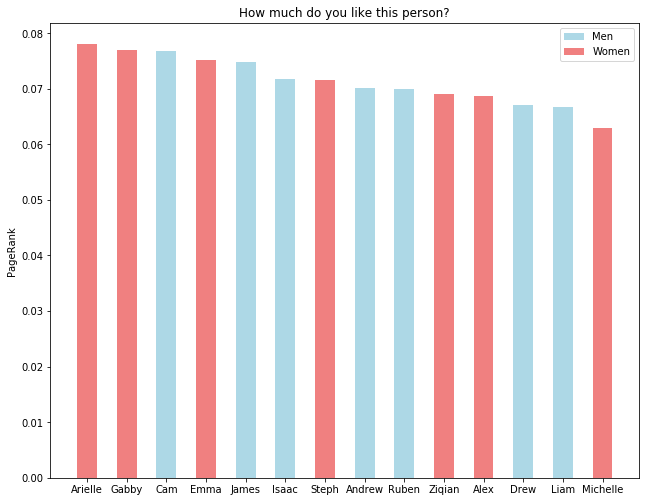

In [27]:
pr_2017_like_descending = []
pr_2017_like_men_values = []
pr_2017_like_women_values = []

for person in pr_2017_like.sort_values(ascending=False).index:
    pr_2017_like_descending += [person]
    if person in men:
        pr_2017_like_men_values += [pr_2017_like[person]]
        pr_2017_like_women_values += [0.0]
    elif person in women:
        pr_2017_like_women_values += [pr_2017_like[person]]
        pr_2017_like_men_values += [0.0]

N = len(pr_2017_like_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, pr_2017_like_men_values, width, color="LightBlue")
p2 = ax.bar(ind, pr_2017_like_women_values, width, color="LightCoral")
ax.set_ylabel('PageRank')
ax.set_title('How much do you like this person?')
ax.set_xticks(ind)
ax.set_xticklabels(pr_2017_like_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

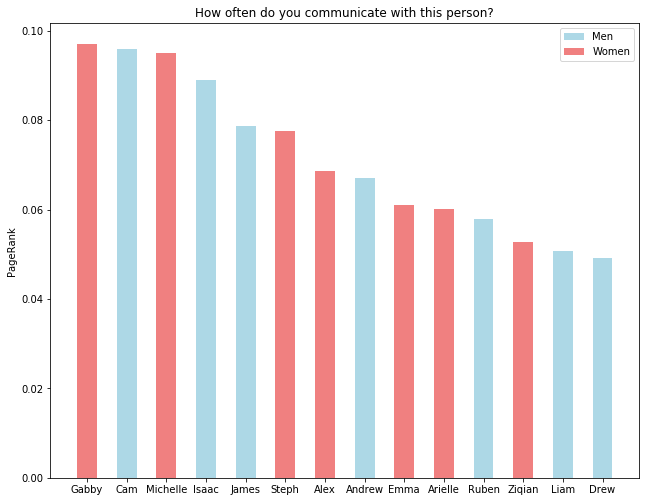

In [28]:
pr_2017_contact_descending = []
pr_2017_contact_men_values = []
pr_2017_contact_women_values = []

for person in pr_2017_contact.sort_values(ascending=False).index:
    pr_2017_contact_descending += [person]
    if person in men:
        pr_2017_contact_men_values += [pr_2017_contact[person]]
        pr_2017_contact_women_values += [0.0]
    elif person in women:
        pr_2017_contact_women_values += [pr_2017_contact[person]]
        pr_2017_contact_men_values += [0.0]

N = len(pr_2017_contact_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, pr_2017_contact_men_values, width, color="LightBlue")
p2 = ax.bar(ind, pr_2017_contact_women_values, width, color="LightCoral")
ax.set_ylabel('PageRank')
ax.set_title('How often do you communicate with this person?')
ax.set_xticks(ind)
ax.set_xticklabels(pr_2017_contact_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How much do you trust this person?

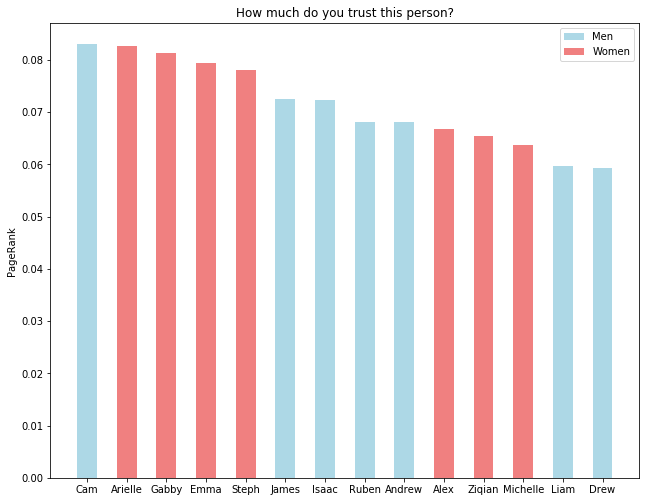

In [29]:
pr_2017_trust_descending = []
pr_2017_trust_men_values = []
pr_2017_trust_women_values = []

for person in pr_2017_trust.sort_values(ascending=False).index:
    pr_2017_trust_descending += [person]
    if person in men:
        pr_2017_trust_men_values += [pr_2017_trust[person]]
        pr_2017_trust_women_values += [0.0]
    elif person in women:
        pr_2017_trust_women_values += [pr_2017_trust[person]]
        pr_2017_trust_men_values += [0.0]

N = len(pr_2017_trust_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, pr_2017_trust_men_values, width, color="LightBlue")
p2 = ax.bar(ind, pr_2017_trust_women_values, width, color="LightCoral")
ax.set_ylabel('PageRank')
ax.set_title('How much do you trust this person?')
ax.set_xticks(ind)
ax.set_xticklabels(pr_2017_trust_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

### How likely are you to go to this person for advice or emotional support?

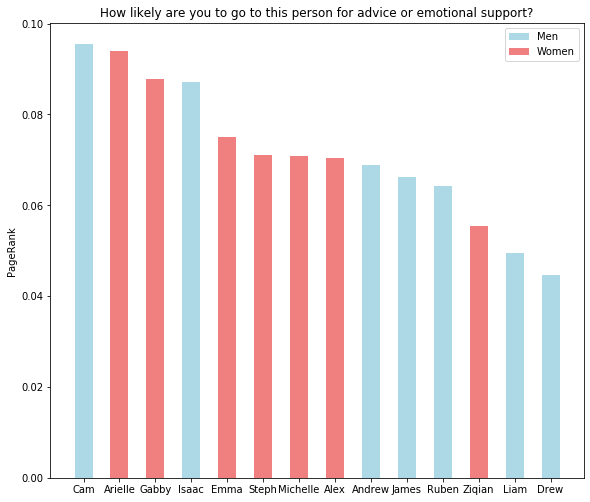

In [30]:
pr_2017_support_descending = []
pr_2017_support_men_values = []
pr_2017_support_women_values = []

for person in pr_2017_support.sort_values(ascending=False).index:
    pr_2017_support_descending += [person]
    if person in men:
        pr_2017_support_men_values += [pr_2017_support[person]]
        pr_2017_support_women_values += [0.0]
    elif person in women:
        pr_2017_support_women_values += [pr_2017_support[person]]
        pr_2017_support_men_values += [0.0]

N = len(pr_2017_support_descending)
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots()
p1 = ax.bar(ind, pr_2017_support_men_values, width, color="LightBlue")
p2 = ax.bar(ind, pr_2017_support_women_values, width, color="LightCoral")
ax.set_ylabel('PageRank')
ax.set_title('How likely are you to go to this person for advice or emotional support?')
ax.set_xticks(ind)
ax.set_xticklabels(pr_2017_support_descending)
ax.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.tight_layout(pad=-10, w_pad=10)
plt.show()

## PageRank: Correlation

In [31]:
pr_2017_all = pd.concat([pr_2017_know, pr_2017_contact, pr_2017_like, pr_2017_trust, pr_2017_support], axis=1, join='inner')
pr_2017_all.columns = ['know', 'contact', 'like', 'trust', 'support']
pr_2017_all

,know,contact,like,trust,support
Steph,0.071081,0.077483,0.071654,0.078023,0.070976
Emma,0.067573,0.061005,0.075167,0.079309,0.075109
Gabby,0.078014,0.096908,0.076961,0.081326,0.087736
Cam,0.083307,0.095811,0.076868,0.082933,0.095395
Andrew,0.068307,0.066945,0.070102,0.068029,0.068847
Isaac,0.078292,0.088954,0.071840,0.072400,0.087159
Alex,0.064576,0.068506,0.068777,0.066819,0.070368
Arielle,0.062643,0.060029,0.077967,0.082595,0.093887
Liam,0.064306,0.050819,0.066715,0.059659,0.049379
James,0.077626,0.078608,0.074821,0.072426,0.066255


In [32]:
corr = pr_2017_all.corr()
corr

,know,contact,like,trust,support
know,1.000000,0.859268,0.188848,0.350875,0.498075
contact,0.859268,1.000000,0.261046,0.483807,0.679220
like,0.188848,0.261046,1.000000,0.907509,0.720300
trust,0.350875,0.483807,0.907509,1.000000,0.865041
support,0.498075,0.679220,0.720300,0.865041,1.000000


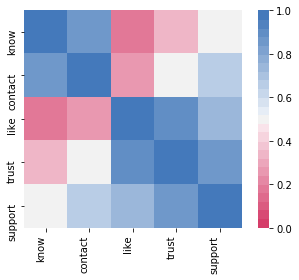

In [33]:
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=.5,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## Correlation Among Raw Data

### How well do you know this person?

In [34]:
data_2017_know_corr = data_2017_know.corr()
data_2017_know_corr

,Steph,Emma,Gabby,Cam,Andrew,Isaac,Alex,Arielle,Liam,James,Drew,Ruben,Ziqian,Michelle
Steph,1.000000,0.092057,0.050572,0.355036,0.431788,0.257915,0.380521,0.380521,0.679957,0.428746,0.437968,0.586170,0.687948,0.085229
Emma,0.092057,1.000000,0.485700,-0.080322,0.062500,0.386969,0.241402,0.129944,0.287306,0.346142,0.400668,0.244946,-0.141990,0.239886
Gabby,0.050572,0.485700,1.000000,-0.115470,0.393458,0.291419,0.086106,-0.056403,0.089074,0.114437,0.000000,0.120241,-0.417365,0.215265
Cam,0.355036,-0.080322,-0.115470,1.000000,0.191988,0.156174,-0.196116,-0.109764,0.320061,-0.092768,0.000000,0.277794,0.786334,0.000000
Andrew,0.431788,0.062500,0.393458,0.191988,1.000000,0.631169,-0.038808,0.095637,0.816497,0.737210,0.419014,0.502331,0.084921,0.450694
Isaac,0.257915,0.386969,0.291419,0.156174,0.631169,1.000000,-0.161400,0.359937,0.464697,0.748983,0.243963,0.427699,-0.034179,0.765705
Alex,0.380521,0.241402,0.086106,-0.196116,-0.038808,-0.161400,1.000000,-0.186352,0.173344,-0.062869,-0.145741,0.322252,-0.094211,-0.215265
Arielle,0.380521,0.129944,-0.056403,-0.109764,0.095637,0.359937,-0.186352,1.000000,0.131306,0.507630,0.282017,0.392255,0.456270,0.295141
Liam,0.679957,0.287306,0.089074,0.320061,0.816497,0.464697,0.173344,0.131306,1.000000,0.682901,0.706058,0.503946,0.424604,0.439252
James,0.428746,0.346142,0.114437,-0.092768,0.737210,0.748983,-0.062869,0.507630,0.682901,1.000000,0.638442,0.519954,0.100167,0.531610


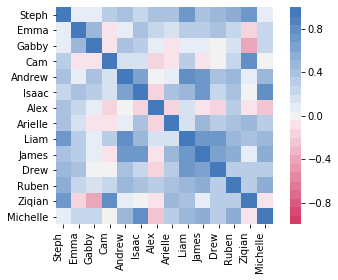

In [35]:
ax = sns.heatmap(
    data_2017_know_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you like this person?

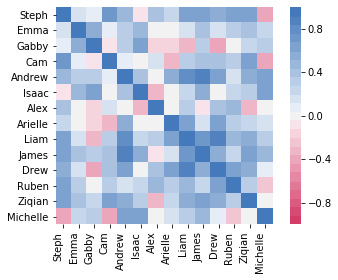

In [36]:
data_2017_like_corr = data_2017_like.corr()
data_2017_like_corr

ax = sns.heatmap(
    data_2017_like_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How often do you communicate with this person (via text, Snapchat, Facebook, in person, etc.)?

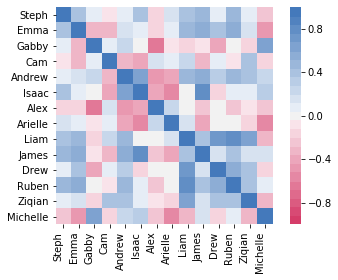

In [37]:
data_2017_contact_corr = data_2017_contact.corr()
data_2017_contact_corr

ax = sns.heatmap(
    data_2017_contact_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How much do you trust this person?

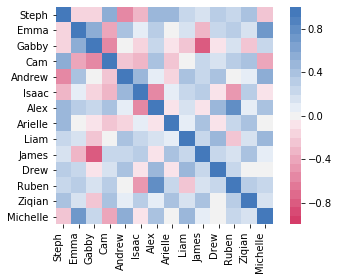

In [38]:
data_2017_trust_corr = data_2017_trust.corr()
data_2017_trust_corr

ax = sns.heatmap(
    data_2017_trust_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### How likely are you to go to this person for advice or emotional support?

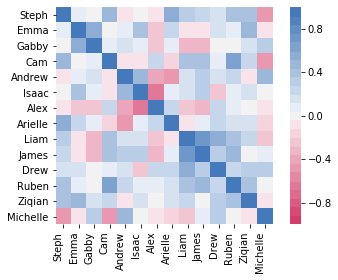

In [39]:
data_2017_support_corr = data_2017_support.corr()
data_2017_support_corr

ax = sns.heatmap(
    data_2017_support_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=25),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);